In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/TASK/Fraud.csv")

In [ ]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df=df.drop(["nameOrig","nameDest"],axis=1)

In [ ]:
print("No. of datasample with Positive Fraud: ",len(df[df["isFraud"]==1]))
print("No. of datasample with No Fraud: ",len(df[df["isFraud"]==0]))

No. of datasample with Positive Fraud:  8213
No. of datasample with No Fraud:  6354407


# <span style='background :yellow' > Note: Since the datasample for positive fraud is very less, Thus the data is highly imbalanced. So accuracy will not tell the actual perfomance rather we should use Precision, Recall and F1-Score for evaluation </span>

<ipython-input-15-b5e53fdcfcdf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')


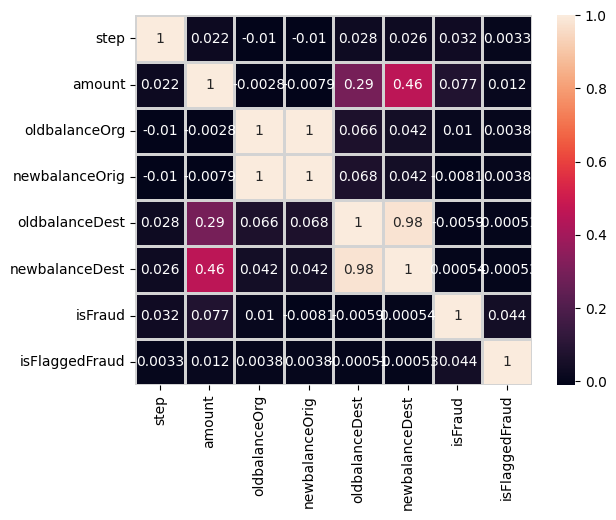

In [ ]:

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

# New Feature created

In [ ]:
df['balanceOrg']=df['oldbalanceOrg']-df['newbalanceOrig']
df['balanceDest']=df['oldbalanceDest']-df['newbalanceDest']
df_new=df.drop(['oldbalanceOrg','oldbalanceDest','newbalanceOrig','newbalanceDest'],axis=1)


In [ ]:
df_new.head()

,step,type,amount,isFraud,isFlaggedFraud,balanceOrg,balanceDest
0,1,PAYMENT,9839.64,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,0,0,1864.28,0.0
2,1,TRANSFER,181.00,1,0,181.00,0.0
3,1,CASH_OUT,181.00,1,0,181.00,21182.0
4,1,PAYMENT,11668.14,0,0,11668.14,0.0


<ipython-input-18-6c23f32f07f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')


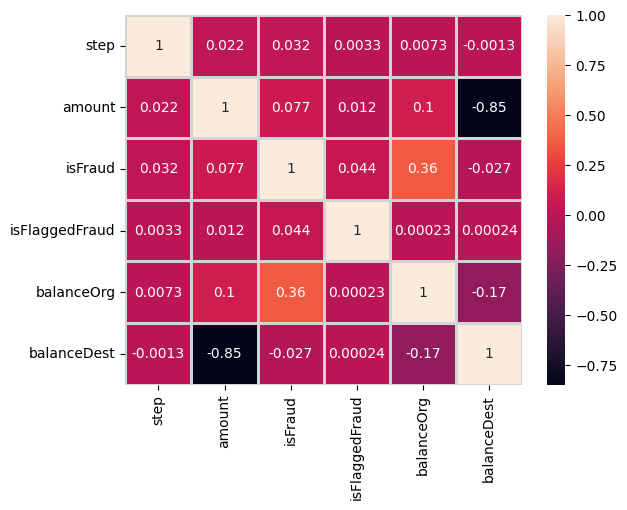

In [ ]:
sns.heatmap(df_new.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [ ]:
df_new[["step","amount","balanceOrg","balanceDest"]].var()


step           2.025839e+04
amount         3.646448e+11
balanceOrg     2.150425e+10
balanceDest    6.608699e+11
dtype: float64


# Huge variance so standarized



In [ ]:
df_new_Std=df_new[["step","amount","balanceOrg","balanceDest"]]
df_new_Std=(df_new_Std-df_new_Std.mean())/df_new_Std.std()


In [ ]:
df_new_std=pd.concat([df_new_Std,df_new[["type","isFraud","isFlaggedFraud"]]],axis=1)

In [ ]:
df_new_std.head(10)

,step,amount,balanceOrg,balanceDest,type,isFraud,isFlaggedFraud
0,-1.703041,-0.281560,0.211876,0.152896,PAYMENT,0,0
1,-1.703041,-0.294767,0.157490,0.152896,PAYMENT,0,0
2,-1.703041,-0.297555,0.146011,0.152896,TRANSFER,1,0
3,-1.703041,-0.297555,0.146011,0.178952,CASH_OUT,1,0
4,-1.703041,-0.278532,0.224345,0.152896,PAYMENT,0,0
5,-1.703041,-0.284908,0.198088,0.152896,PAYMENT,0,0
6,-1.703041,-0.286084,0.193247,0.152896,PAYMENT,0,0
7,-1.703041,-0.284836,0.198388,0.152896,PAYMENT,0,0
8,-1.703041,-0.291190,0.162991,0.152896,PAYMENT,0,0
9,-1.703041,-0.289015,0.181177,0.154801,DEBIT,0,0


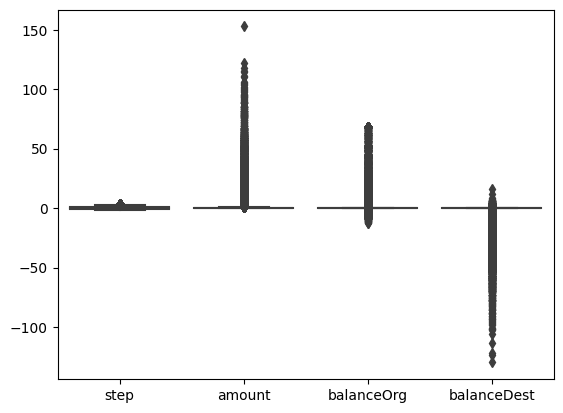

In [ ]:
# Box plot to detect outliers
sns.boxplot(data=df_new_std[["step","amount","balanceOrg","balanceDest"]])
plt.show()


# One Hot-Encoding

In [ ]:
# Use pandas get_dummies to perform one-hot encoding
one_hot_encoded = pd.get_dummies(df_new_std, columns=['type'])

# Display the one-hot encoded DataFrame
one_hot_encoded.head()

,step,amount,balanceOrg,balanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.703041,-0.281560,0.211876,0.152896,0,0,0,0,0,1,0
1,-1.703041,-0.294767,0.157490,0.152896,0,0,0,0,0,1,0
2,-1.703041,-0.297555,0.146011,0.152896,1,0,0,0,0,0,1
3,-1.703041,-0.297555,0.146011,0.178952,1,0,0,1,0,0,0
4,-1.703041,-0.278532,0.224345,0.152896,0,0,0,0,0,1,0


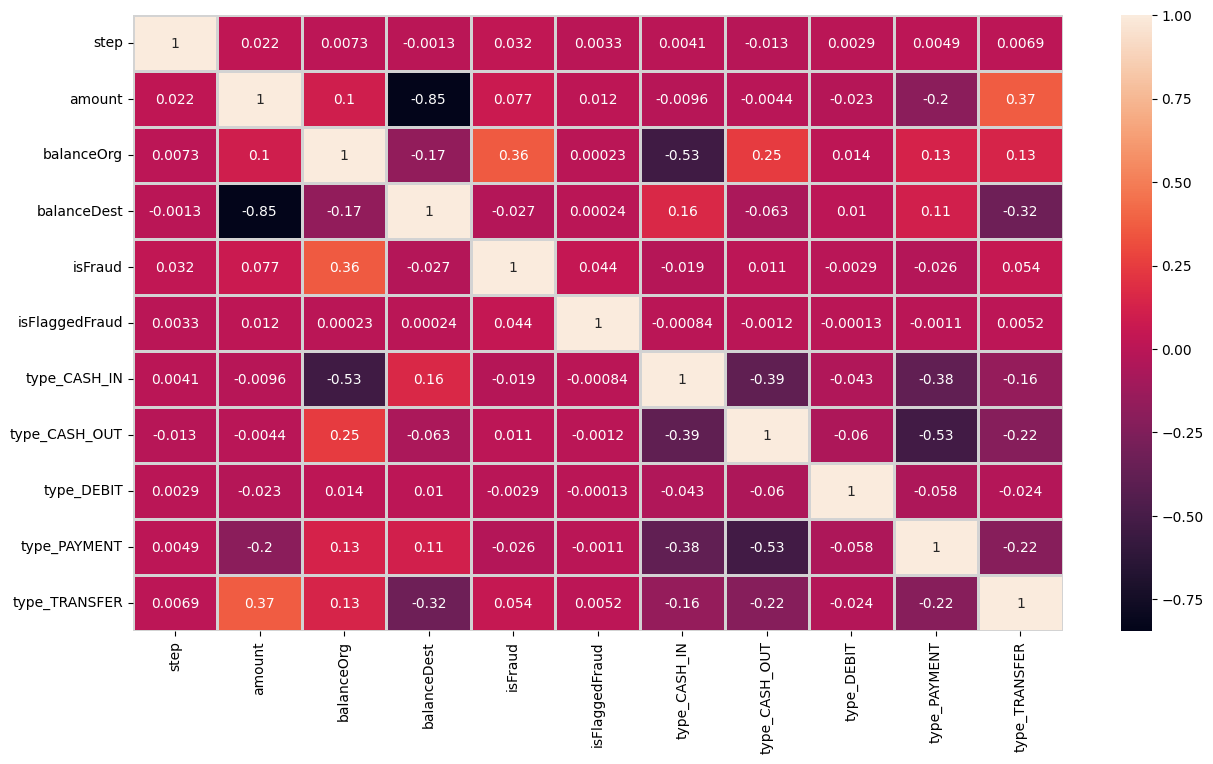

In [ ]:
plt.figure(figsize = (15, 8))
sns.heatmap(one_hot_encoded.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [ ]:
X=one_hot_encoded.drop(["isFraud"],axis=1)
Y=one_hot_encoded["isFraud"]
X.head()

,step,amount,balanceOrg,balanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.703041,-0.281560,0.211876,0.152896,0,0,0,0,1,0
1,-1.703041,-0.294767,0.157490,0.152896,0,0,0,0,1,0
2,-1.703041,-0.297555,0.146011,0.152896,0,0,0,0,0,1
3,-1.703041,-0.297555,0.146011,0.178952,0,0,1,0,0,0
4,-1.703041,-0.278532,0.224345,0.152896,0,0,0,0,1,0


# PCA for Dimention reduction

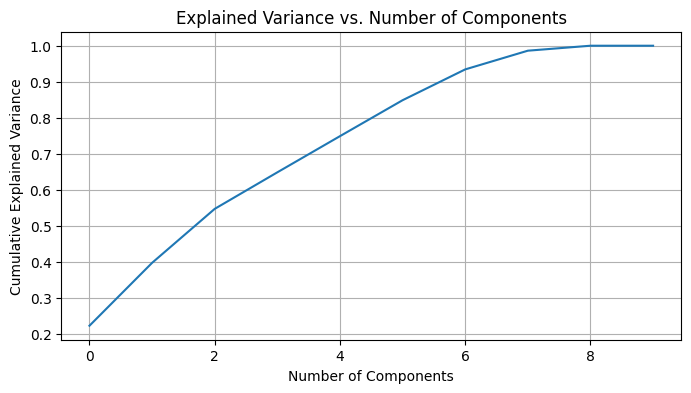

Optimal number of components (k) for 95.0% variance: 8


In [ ]:
#Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA with a large number of components
pca = PCA()

# Fit PCA to your standardized data
principal_components = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio for different numbers of components
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Determine the optimal number of components (k)
cumulative_variance_threshold = 0.95  # Set your desired threshold
optimal_k = np.argmax(np.cumsum(explained_variance_ratio) >= cumulative_variance_threshold) + 1

print(f"Optimal number of components (k) for {cumulative_variance_threshold * 100}% variance: {optimal_k}")

In [ ]:
# Initialize PCA with the number of components you want to retain
n_components = 8  # Specify the number of principal components to keep
pca = PCA(n_components=n_components)

# Fit PCA to your standardized data
principal_components = pca.fit_transform(X_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(principal_components, Y, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts()

0    5083503
1       6593
Name: isFraud, dtype: int64

In [ ]:
y_test.value_counts()

0    1270904
1       1620
Name: isFraud, dtype: int64

In [ ]:
# 6. Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
naive_bayes_predictions = naive_bayes_model.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)

print("Naive Bayes Accuracy:", naive_bayes_accuracy)
print("Naive Bayes Classification Report:\n", classification_report(y_test, naive_bayes_predictions))

Naive Bayes Accuracy: 0.9901730733565732
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270904
           1       0.06      0.45      0.10      1620

    accuracy                           0.99   1272524
   macro avg       0.53      0.72      0.55   1272524
weighted avg       1.00      0.99      0.99   1272524



Confusion Matrix:
[[1259290   11614]
 [    891     729]]


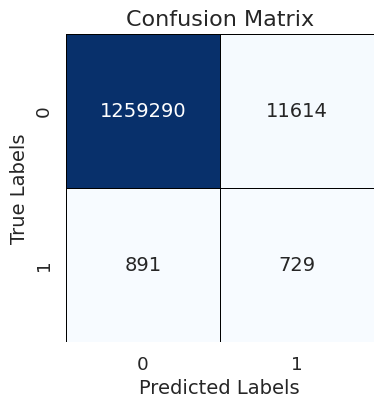

In [ ]:
# Assuming you have true labels (y_true) and predicted labels (y_pred)
confusion = confusion_matrix(y_test, naive_bayes_predictions)

print("Confusion Matrix:")
print(confusion)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5, linecolor='black', square=True)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.show()

In [ ]:
# 5. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print("K-Nearest Neighbors (KNN) Accuracy:", knn_accuracy)
print("K-Nearest Neighbors (KNN) Classification Report:\n", classification_report(y_test, knn_predictions))

K-Nearest Neighbors (KNN) Accuracy: 0.9995355686808265
K-Nearest Neighbors (KNN) Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.92      0.69      0.79      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.85      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524



Confusion Matrix:
[[1270812      92]
 [    499    1121]]


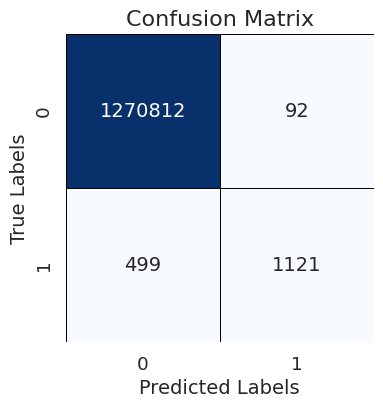

In [ ]:
# Assuming you have true labels (y_true) and predicted labels (y_pred)
confusion = confusion_matrix(y_test, knn_predictions)

print("Confusion Matrix:")
print(confusion)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5, linecolor='black', square=True)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.show()

In [ ]:
# 1. Logistic Regression
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)
logistic_regression_predictions = logistic_regression_model.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)

print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_regression_predictions))


Logistic Regression Accuracy: 0.9992542380340175
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.47      0.62      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.73      0.81   1272524
weighted avg       1.00      1.00      1.00   1272524



Confusion Matrix:
[[1270815      89]
 [    860     760]]


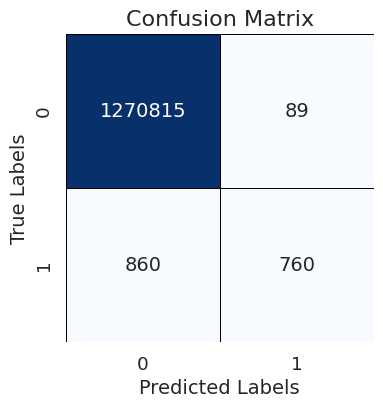

In [ ]:
# Assuming you have true labels (y_true) and predicted labels (y_pred)
confusion = confusion_matrix(y_test, logistic_regression_predictions)

print("Confusion Matrix:")
print(confusion)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5, linecolor='black', square=True)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.show()

In [ ]:
# 2. Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

print("Random Forest Accuracy:", random_forest_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, random_forest_predictions))

Random Forest Accuracy: 0.9996180818593599
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.94      0.75      0.83      1620

    accuracy                           1.00   1272524
   macro avg       0.97      0.87      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



Confusion Matrix:
[[1270831      73]
 [    413    1207]]


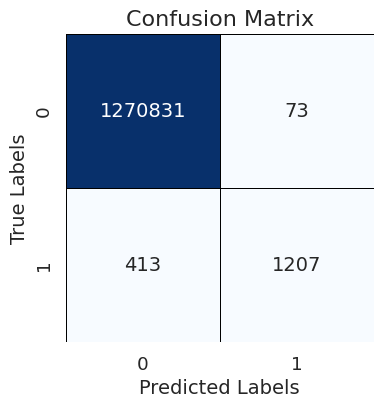

In [ ]:
# Assuming you have true labels (y_true) and predicted labels (y_pred)
confusion = confusion_matrix(y_test, random_forest_predictions)

print("Confusion Matrix:")
print(confusion)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5, linecolor='black', square=True)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

plt.show()

# Since the data was highly imbalanced, so the accuray will not be the main factor for deciding perfomace of the model but the precision, recall and f1-score will be more useful to decide the performace.
# <span style='background :yellow' > After going through classification report and confusion matrix of all the models, It is observed the Random Forest gives the best result</span>
